## Using Crypto Currency Data from [link](https://pythonprogramming.net/static/downloads/machine-learning-data/crypto_data.zip)

In [1]:
import pandas as pd
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Dense,LSTM,BatchNormalization,Dropout


sns.set_theme(style="darkgrid")

In [2]:
BTC_Path = "crypto_data/BTC-USD.csv"

df = pd.read_csv(BTC_Path,names=['time', 'low', 'high', 'open', 'close', 'volume'])

In [12]:
# 6 Columns and 97724 Entries 
df.shape

(97724, 6)

In [21]:
# Find Structure of DF 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97724 entries, 0 to 97723
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    97724 non-null  int64  
 1   low     97724 non-null  float64
 2   high    97724 non-null  float64
 3   open    97724 non-null  float64
 4   close   97724 non-null  float64
 5   volume  97724 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 4.5 MB


In [22]:
# Find Details of Dataframe 
df.describe()

,time,low,high,open,close,volume
count,9.772400e+04,97724.000000,97724.000000,97724.000000,97724.000000,97724.000000
mean,1.531994e+09,6771.924414,6775.026861,6773.515356,6773.521546,6.026660
std,1.812122e+06,641.329630,641.386880,641.351570,641.354134,16.640351
min,1.528969e+09,5777.000000,5787.259766,5781.609863,5778.109863,0.001915
25%,1.530441e+09,6340.000000,6342.987671,6341.479980,6341.470215,0.824953
50%,1.531906e+09,6535.000000,6538.000000,6536.395019,6536.375000,2.008043
75%,1.533428e+09,7283.254883,7290.000000,7286.852539,7286.490112,4.967114
max,1.535215e+09,8477.910156,8488.000000,8482.809570,8482.799805,801.442993


In [13]:
'''
Column Descriptions : 

#low    - Low is the lowest price of the stock during a Trading period.

#high   - High is the highest price at which a stock traded during a Trading period

#open   - Open means the price at which a stock started trading during start of Trading Period 

#close  - Close refers to the price of an individual stock at the end of Trading Period 

#volume - Volume is the total number of stock traded in over a Trading period

'''

df.columns

Index(['time', 'low', 'high', 'open', 'close', 'volume'], dtype='object')

In [14]:
#We can see that the dataset has information for every minute 
pd.to_datetime(df['time'],unit='s')

0       2018-06-14 09:31:00
1       2018-06-14 09:32:00
2       2018-06-14 09:33:00
3       2018-06-14 09:34:00
4       2018-06-14 09:35:00
                ...        
97719   2018-08-25 16:36:00
97720   2018-08-25 16:37:00
97721   2018-08-25 16:38:00
97722   2018-08-25 16:39:00
97723   2018-08-25 16:40:00
Name: time, Length: 97724, dtype: datetime64[ns]

In [23]:
# Data Cleaning 
df.isna().sum()

time      0
low       0
high      0
open      0
close     0
volume    0
dtype: int64

### Preprocessing Data for Training 
###### We will focus on closing prices only for this stage 

In [24]:
btc_close = df[['time','close']].copy()

In [27]:
btc_close.head()

,time,close
0,1528968660,6489.549805
1,1528968720,6487.379883
2,1528968780,6479.410156
3,1528968840,6479.410156
4,1528968900,6479.979980


<AxesSubplot:xlabel='time', ylabel='close'>

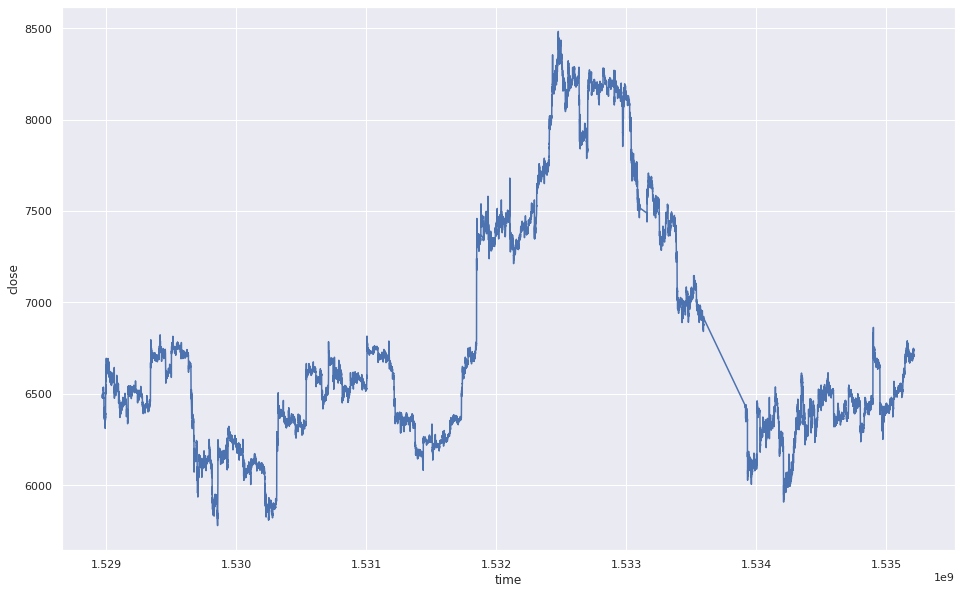

In [26]:
plt.figure(figsize=(16,10))
sns.lineplot(data=btc_close,x="time",y="close")

In [28]:
# Normalize Close Prices 
btc_close['close_normalized'] = (btc_close['close'] - btc_close['close'].mean() ) / btc_close['close'].std()

<AxesSubplot:xlabel='time', ylabel='close_normalized'>

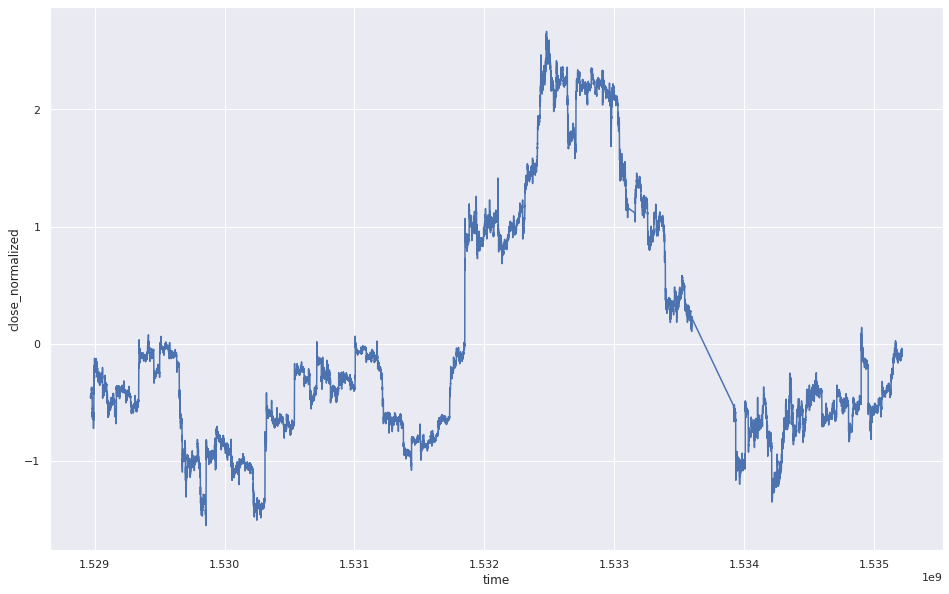

In [29]:
plt.figure(figsize=(16,10))
sns.set_theme(style="darkgrid")
sns.lineplot(data=btc_close,x="time",y="close_normalized")

In [51]:
# Split the DF into train,validation and test with 80:10:30 split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(btc_close['time'],btc_close['close_normalized'],test_size = 0.3)

In [52]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size = 0.1)

In [59]:
# Shape of Datasets 
print(f"Shape of X_train is {X_train.shape}")
print(f"Shape of X_val is {X_val.shape}")
print(f"Shape of X_test is {X_test.shape}")
print("----")
print(f"Shape of y_train is {y_train.shape}")
print(f"Shape of y_val is {y_val.shape}")
print(f"Shape of y_test is {y_test.shape}")

Shape of X_train is (61565,)
Shape of X_val is (6841,)
Shape of X_test is (29318,)
----
Shape of y_train is (61565,)
Shape of y_val is (6841,)
Shape of y_test is (29318,)
